# Testing with Concept Activation Vectors (TCAV)

Introduced by [Kim et al. (2018)](https://arxiv.org/pdf/1711.11279.pdf)

In [ ]:
from torchvision.models import resnet50

model = resnet50(pretrained=True)

In [1]:
concept = "cup"
k_class = "bottle"

## Get images for classifier

We will use the [pycocotools](https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb) API to retrieve some examples of chairs:

In [2]:
from pycocotools.coco import COCO

coco = COCO("./datasets/instances_val2017.json")

loading annotations into memory...
Done (t=0.74s)
creating index...
index created!


Let's get the IDs of the images in the coco dataset that have the concept of _chair_:

In [3]:
concept_cat_id = coco.getCatIds(catNms=[concept])
concept_imgs_ids = coco.getImgIds(catIds=concept_cat_id)
len(concept_imgs_ids)

390

Let's remove the images where chairs are accompanied by dining table:

In [4]:
overlap_cats_ids = coco.getCatIds(catNms=[concept, k_class])
overlap_imgs_ids = coco.getImgIds(catIds=overlap_cats_ids)
len(overlap_imgs_ids)

128

In [5]:
filt_concept_imgs_ids = [img_id for img_id in concept_imgs_ids if img_id not in overlap_imgs_ids]
assert len(filt_concept_imgs_ids) == (len(concept_imgs_ids) - len(overlap_imgs_ids))

Let's grab random images for the other class of the classifier:

In [6]:
import random

all_imgs_ids = list(coco.imgs.keys())
not_concept_imgs_ids = [img_id for img_id in all_imgs_ids if img_id not in concept_imgs_ids]
random.Random(0).shuffle(not_concept_imgs_ids)
not_concept_imgs_ids = not_concept_imgs_ids[:len(filt_concept_imgs_ids)]

assert not any(img_id in not_concept_imgs_ids for img_id in concept_imgs_ids)

## Extract activations from images

In [7]:
from collections import OrderedDict

repr_input = OrderedDict()
repr_output = OrderedDict()

def get_representation(name):
    def hook(model, input, output):
        repr_output[name] = output.detach()
    return hook

In [8]:
from torchvision import transforms

normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)

preprocessing = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize,
])

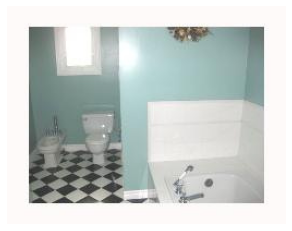

In [17]:
from PIL import Image
import skimage.io as io
import matplotlib.pyplot as plt

img_id = not_concept_imgs_ids[5]
img_url =  coco.loadImgs(img_id)[0]["coco_url"]
img = io.imread(img_url)
img_pil = Image.fromarray(img)
prepro_img = preprocessing(img_pil)
#type(img)

plt.axis('off')
plt.imshow(img)
plt.show()

In [ ]:
prepro_img.shape

In [ ]:

plt.axis('off')
plt.imshow(img)
plt.show()